1. IMPORTING LIBRARIES. 

In [6]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2. LOAD AND PREPROCESS THE DATASET. 


We need to load the images from the dataset, resize them, and label them. 

In [7]:
#Defining the dataset path and image size. 
dataset_path = 'C:/Users/HP/Desktop/PRODIGY_ML_04/leapGestRecog'
IMG_SIZE = 64  #Resize all images to 64x64. 

#Initialize data and labels lists. 
data = []
labels = []

In [11]:

#Iterating through dataset folders and loading the images. 
for folder in os.listdir(folder_path):
    folder_full_path = os.path.join(folder_path, folder)
    if os.path.isdir(folder_full_path):  #Check if it's a directory
        for image in os.listdir(folder_full_path):
            img_path = os.path.join(folder_full_path, image)
            
            #Ensure the file has an image extension
            if image.endswith(('.png', '.jpg', '.jpeg')):
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                    data.append(img)
                    labels.append(folder)
                else:
                    print(f"Error loading image: {img_path}")
            else:
                print(f"Skipping non-image file: {img_path}")

In [12]:
#Converting data and labels to numpy arrays. 
data = np.array(data).reshape(-1, IMG_SIZE, IMG_SIZE, 1)  #Add a channel dimension
labels = np.array(labels)

3. PREPROCESSING THE LABELS. 


Converting the labels to numerical format using `LabelBinarizer`. 

In [13]:
#Binarize the labels (one-hot encoding). 
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [14]:
#Splitting the dataset into training and testing sets. 
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

4. DATA AUGMENTATION. 


To improve model performance, we have to use ImageDataGenerator for data augmentation. 

In [16]:
#Data augmentation to avoid overfitting. 
datagen = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=True
)

datagen.fit(x_train)


5. BUILD THE CNN MODEL. 


Defining the architecture of the CNN. 

In [17]:
model = Sequential()

#First convolutional layer. 
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Second convolutional layer. 
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Third convolutional layer. 
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Flatten the output. 
model.add(Flatten())

#Fully connected layer. 
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

#Output layer. 
model.add(Dense(len(lb.classes_), activation='softmax'))

#Compile the model. 
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,275,146 (4.86 MB)

 Trainable params: 1,275,146 (4.86 MB)

 Non-trainable params: 0 (0.00 B)

6. TRAIN THE MODEL. 


Training the model using the training dataset and validate with the test dataset. 

In [18]:
#Train the model. 
history = model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=20, validation_data=(x_test, y_test))


Epoch 1/20


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 124ms/step - accuracy: 0.1943 - loss: 9.7657 - val_accuracy: 0.7950 - val_loss: 0.9255
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - accuracy: 0.5099 - loss: 1.4278 - val_accuracy: 0.9375 - val_loss: 0.3600
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - accuracy: 0.7029 - loss: 0.8718 - val_accuracy: 0.9450 - val_loss: 0.1131
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - accuracy: 0.7744 - loss: 0.6545 - val_accuracy: 0.9300 - val_loss: 0.1670
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - accuracy: 0.8652 - loss: 0.4021 - val_accuracy: 0.9950 - val_loss: 0.0965
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - accuracy: 0.8715 - loss: 0.3637 - val_accuracy: 0.9875 - val_loss: 0.0651
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - accuracy: 0.9045 - loss: 0.2704 - val_accuracy: 0.9975 - val_loss: 0.0367
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 125ms/step - accuracy: 0.9169 - loss: 0.2720 - val_accuracy: 1.0000 - val_

7. EVALUATING THE MODEL. 


Evaluating the model on the test dataset. 

In [19]:
#Evaluate the model. 
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test Accuracy: {test_acc * 100:.2f}%')


13/13 - 1s - 39ms/step - accuracy: 1.0000 - loss: 9.6978e-04
Test Accuracy: 100.00%


8. VISUALIZING THE TRAINING RESULTS. 


Visualize the model's accuracy and loss over epochs. 

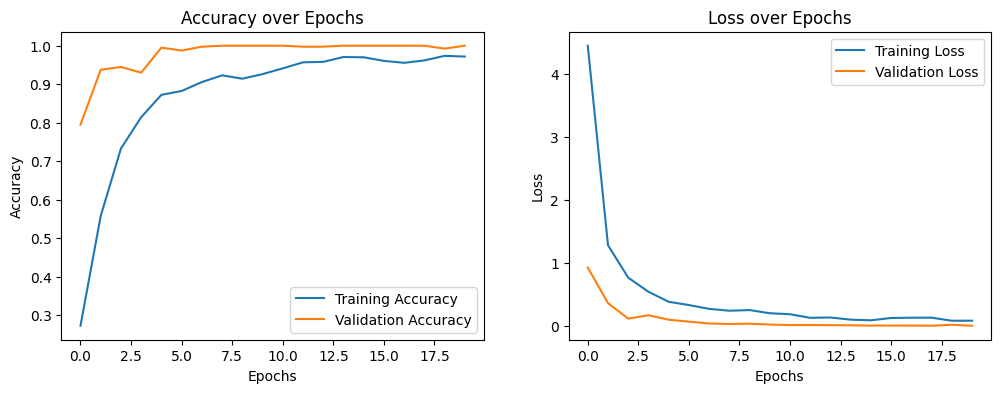

In [20]:
#Plot accuracy and loss over epochs. 
plt.figure(figsize=(12, 4))

#Accuracy. 
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

#Loss. 
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.show()


9. MAKE PREDICTIONS. 


Finally, test the model by making predictions on new images. 

In [21]:
#Test the model on new data. 
def predict_gesture(image):
    img = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    img = img.reshape(1, IMG_SIZE, IMG_SIZE, 1)
    prediction = model.predict(img)
    class_idx = np.argmax(prediction)
    return lb.classes_[class_idx]

In [22]:
#Example usage. 
sample_image = x_test[0]
predicted_label = predict_gesture(sample_image)
print(f'Predicted Label: {predicted_label}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
Predicted Label: 10_down


10. SAVING THE MODEL. 


Saving the trained model. 

In [24]:
model.save('gesture_recognition_model.keras')
